<a href="https://colab.research.google.com/github/NguyenVanLuu821/KT_AI/blob/main/NguyenVanLuu_19146355_Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [91]:
#Load Data 
with open('data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

#handling data
x_train = x_train.astype('float32')
x_train /= 255

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, 4)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [92]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [94]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 12s 12s/step - loss: 0.8246 - accuracy: 0.8594 - val_loss: 3.6506 - val_accuracy: 0.1875
Epoch 2/15
1/1 [==============================] - 15s 15s/step - loss: 3.0560 - accuracy: 0.4062 - val_loss: 5.6319 - val_accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 8s 8s/step - loss: 7.0218 - accuracy: 0.4531 - val_loss: 2.7835 - val_accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 8s 8s/step - loss: 3.1103 - accuracy: 0.4531 - val_loss: 1.8661 - val_accuracy: 0.2500
Epoch 5/15
1/1 [==============================] - 8s 8s/step - loss: 1.5225 - accuracy: 0.4844 - val_loss: 1.5453 - val_accuracy: 0.1250
Epoch 6/15
1/1 [==============================] - 8s 8s/step - loss: 1.1315 - accuracy: 0.4062 - val_loss: 1.4456 - val_accuracy: 0.2500
Epoch 7/15
1/1 [==============================] - 8s 8s/step - loss: 1.0682 - accuracy: 0.8281 - val_loss: 1.4362 - val_accuracy: 0.1875
Epoch 8/15
1/1 [==============================] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


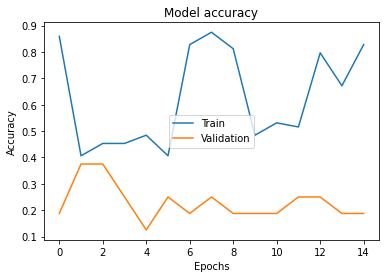

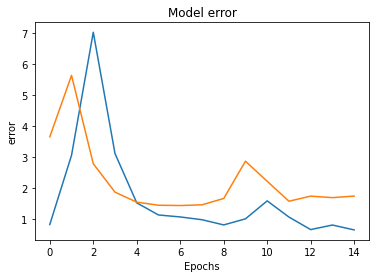

In [95]:
#plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()

In [96]:
model.save_weights('Emations_cnn.h5')

In [97]:
label = ['hanhphuc', 'buon', 'giandu','ngacnhien']

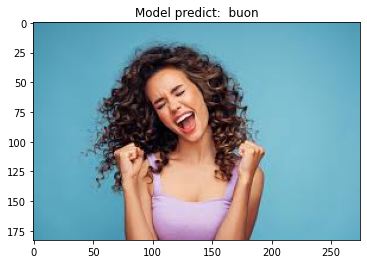

In [98]:
#import img
img = cv2.resize(cv2.imread('happy.jpg'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)

#detect face 
plt.title("Model predict:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('happy.jpg'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

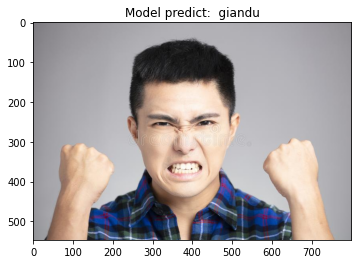

In [99]:
#import img
img = cv2.resize(cv2.imread('ungry.jpg'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)
#detect face 
plt.title("Model predict:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('ungry.jpg'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

In [100]:
model.predict(img)

array([[0.00582405, 0.02732241, 0.8133169 , 0.15353665]], dtype=float32)

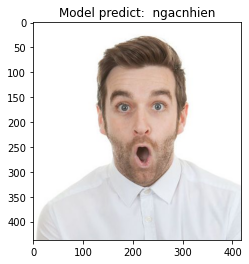

In [101]:
#import img
img = cv2.resize(cv2.imread('suprise.jpg'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)
#detect face 
plt.title("Model predict:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('suprise.jpg'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

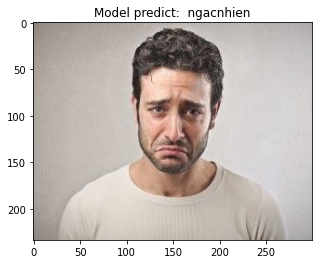

In [102]:
#import img
img = cv2.resize(cv2.imread('sad.jpg'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)
#detect face 
plt.title("Model predict:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('sad.jpg'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

In [35]:
model.predict(img)

array([[0.2759329 , 0.03569405, 0.09175126, 0.5966218 ]], dtype=float32)